In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('F:\Database\\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df.shape

(5110, 12)

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.mean()

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

In [7]:
df= df.fillna(df.mean())

In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df =df.replace(to_replace="Yes", value="1")
df =df.replace(to_replace="No", value="0")

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


In [12]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [13]:
df = pd.DataFrame.rename(df,columns={'Residence_type':'Urban'})
df =df.replace(to_replace="Urban", value="1")
df =df.replace(to_replace="Rural", value="0")

In [14]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Urban,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [15]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [16]:
df =df.replace(to_replace="smokes", value="1")
df =df.replace(to_replace="never smoked", value="0")
df =df.replace(to_replace="formerly smoked", value="2")
df = pd.DataFrame.rename(df,columns={'smoking_status':'smokes=1,never smoked=0,formerly smoked=2'})

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Urban,avg_glucose_level,bmi,"smokes=1,never smoked=0,formerly smoked=2",stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.600000,2,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,0,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.500000,0,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.400000,1,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,0,1


In [18]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [19]:
df =df.replace(to_replace="Male", value="1")
df =df.replace(to_replace="Female", value="0")
df = pd.DataFrame.rename(df,columns={'gender':'Male'})

In [20]:
df.head()

,id,Male,age,hypertension,heart_disease,ever_married,work_type,Urban,avg_glucose_level,bmi,"smokes=1,never smoked=0,formerly smoked=2",stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.600000,2,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,0,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.500000,0,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.400000,1,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,0,1


In [21]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [22]:
dfn = df.iloc[:,[0,1,2,3,4,5,7,8,9,10,11]]
dfn.head()

,id,Male,age,hypertension,heart_disease,ever_married,Urban,avg_glucose_level,bmi,"smokes=1,never smoked=0,formerly smoked=2",stroke
0,9046,1,67.0,0,1,1,1,228.69,36.600000,2,1
1,51676,0,61.0,0,0,1,0,202.21,28.893237,0,1
2,31112,1,80.0,0,1,1,0,105.92,32.500000,0,1
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,1
4,1665,0,79.0,1,0,1,0,174.12,24.000000,0,1


In [23]:
dfn = dfn.sort_values(by=["Male"])
dfn

,id,Male,age,hypertension,heart_disease,ever_married,Urban,avg_glucose_level,bmi,"smokes=1,never smoked=0,formerly smoked=2",stroke
2554,72369,0,14.0,0,0,0,0,65.41,19.500000,Unknown,0
3007,3135,0,73.0,0,0,0,0,69.35,28.893237,0,0
3008,563,0,41.0,0,0,1,0,216.71,36.200000,0,0
3009,19364,0,7.0,0,0,0,0,74.96,18.800000,Unknown,0
3011,55459,0,60.0,0,0,0,0,91.82,28.300000,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1166,33622,1,62.0,1,0,1,1,211.49,41.100000,Unknown,0
3161,51554,1,42.0,0,0,1,1,177.91,28.893237,Unknown,0
3162,2296,1,78.0,1,0,1,1,90.19,28.893237,Unknown,0
1183,13602,1,73.0,1,0,1,0,102.06,28.893237,Unknown,0


In [24]:
dfn = dfn.iloc[:-1,:]
dfn

,id,Male,age,hypertension,heart_disease,ever_married,Urban,avg_glucose_level,bmi,"smokes=1,never smoked=0,formerly smoked=2",stroke
2554,72369,0,14.0,0,0,0,0,65.41,19.500000,Unknown,0
3007,3135,0,73.0,0,0,0,0,69.35,28.893237,0,0
3008,563,0,41.0,0,0,1,0,216.71,36.200000,0,0
3009,19364,0,7.0,0,0,0,0,74.96,18.800000,Unknown,0
3011,55459,0,60.0,0,0,0,0,91.82,28.300000,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1169,39661,1,18.0,0,0,1,0,140.52,27.400000,0,0
1166,33622,1,62.0,1,0,1,1,211.49,41.100000,Unknown,0
3161,51554,1,42.0,0,0,1,1,177.91,28.893237,Unknown,0
3162,2296,1,78.0,1,0,1,1,90.19,28.893237,Unknown,0


In [25]:
dfn['Male'].unique()

array(['0', '1'], dtype=object)

In [26]:
dfn.sort_values(by=['smokes=1,never smoked=0,formerly smoked=2'])


,id,Male,age,hypertension,heart_disease,ever_married,Urban,avg_glucose_level,bmi,"smokes=1,never smoked=0,formerly smoked=2",stroke
92,66315,0,57.0,0,0,0,1,68.02,37.500000,0,1
949,20044,0,47.0,0,0,1,0,98.58,23.200000,0,0
1514,41820,0,35.0,0,0,1,0,89.11,24.400000,0,0
1515,72474,0,82.0,0,0,1,0,58.30,20.400000,0,0
946,62709,0,47.0,0,0,1,0,204.63,43.400000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
46,37937,0,75.0,0,1,0,1,109.78,28.893237,Unknown,1
752,30550,0,78.0,0,0,0,1,103.86,30.600000,Unknown,0
814,10324,0,5.0,0,0,0,1,93.88,14.600000,Unknown,0
893,42482,0,4.0,0,0,0,1,62.61,21.200000,Unknown,0


In [27]:
dfn = dfn.loc[dfn["smokes=1,never smoked=0,formerly smoked=2"]!="Unknown"]
dfn

,id,Male,age,hypertension,heart_disease,ever_married,Urban,avg_glucose_level,bmi,"smokes=1,never smoked=0,formerly smoked=2",stroke
3007,3135,0,73.0,0,0,0,0,69.35,28.893237,0,0
3008,563,0,41.0,0,0,1,0,216.71,36.200000,0,0
3011,55459,0,60.0,0,0,0,0,91.82,28.300000,2,0
3012,38724,0,49.0,1,0,1,1,56.37,39.400000,1,0
3014,35716,0,55.0,1,0,1,1,202.67,40.400000,2,0
...,...,...,...,...,...,...,...,...,...,...,...
0,9046,1,67.0,0,1,1,1,228.69,36.600000,2,1
3147,64986,1,55.0,0,0,1,1,108.64,29.500000,0,0
3150,69979,1,73.0,0,0,1,0,231.43,23.000000,1,0
3152,20094,1,54.0,1,0,1,1,220.26,28.000000,2,0


In [28]:
dfn['smokes=1,never smoked=0,formerly smoked=2'].unique()

array(['0', '2', '1'], dtype=object)

In [29]:
dfn.sort_values(by='id')

,id,Male,age,hypertension,heart_disease,ever_married,Urban,avg_glucose_level,bmi,"smokes=1,never smoked=0,formerly smoked=2",stroke
4230,67,0,17.0,0,0,0,1,92.97,28.893237,2,0
1010,84,1,55.0,0,0,1,1,89.17,31.500000,0,0
2528,91,0,42.0,0,0,0,1,98.53,18.500000,0,0
419,129,0,24.0,0,0,0,1,97.55,26.200000,0,0
1129,156,0,33.0,0,0,1,0,86.97,42.200000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1505,72824,1,46.0,0,0,1,0,59.05,28.300000,2,0
1163,72861,0,52.0,0,0,1,1,69.30,20.100000,0,0
707,72882,1,47.0,0,0,1,0,75.30,25.000000,2,0
270,72911,0,57.0,1,0,1,0,129.54,60.900000,1,0


In [30]:
dfn['stroke'].value_counts()

0    3363
1     202
Name: stroke, dtype: int64

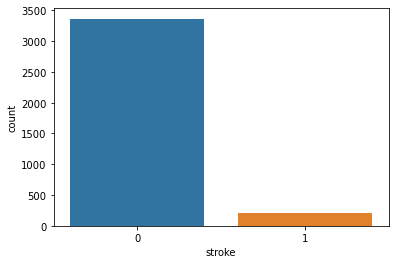

In [31]:
sns.countplot(x="stroke",data= dfn)
plt.show()

In [32]:
x = pd.DataFrame(dfn.iloc[:,:-1])
y = pd.DataFrame(dfn.iloc[:,-1])

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [34]:
from sklearn.linear_model import LogisticRegression
lgl = LogisticRegression()
lgl.fit(x_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [35]:
y_pred = lgl.predict(x_test)

In [36]:
print("Accuracy",(lgl.score(x_test,y_test)))

Accuracy 0.9396914446002805


In [37]:
from sklearn.metrics import confusion_matrix
cnfnmat = confusion_matrix(y_test,y_pred)
print(cnfnmat)

[[670   0]
 [ 43   0]]
